THEORITICAL QUESTIONS

1. **What is a Support Vector Machine (SVM)?**  
   - SVM is a supervised machine learning algorithm used for classification and regression. It finds the optimal hyperplane that maximizes the margin between classes in the feature space. The data points closest to the hyperplane are called support vectors.

2. **What is the difference between Hard Margin and Soft Margin SVM?**  
   - **Hard Margin SVM** requires perfect separation of classes, which can lead to overfitting.  
   - **Soft Margin SVM** allows some misclassifications by introducing a slack variable (controlled by the regularization parameter `C`), making it more robust to noise.

3. **What is the mathematical intuition behind SVM?**  
   - SVM aims to minimize the norm of the weight vector (`||w||²`) while ensuring that data points are correctly classified (or within the margin for soft SVM). This forms a convex optimization problem solved using Lagrange multipliers.

4. **What is the role of Lagrange Multipliers in SVM?**  
   - Lagrange multipliers convert the constrained optimization problem (maximizing the margin) into an unconstrained dual problem. They help identify the support vectors and simplify the computation of the decision boundary.

5. **What are Support Vectors in SVM?**  
   - Support vectors are the data points closest to the hyperplane. They directly influence the position and orientation of the hyperplane, as the margin depends only on these points.

6. **What is a Support Vector Classifier (SVC)?**  
   - SVC is the classification variant of SVM. It can use different kernels (e.g., linear, polynomial, RBF) to handle both linearly separable and non-linearly separable data.

7. **What is a Support Vector Regressor (SVR)?**  
   - SVR adapts SVM for regression tasks. It aims to fit the data within a margin (ε) while minimizing prediction errors, using a similar optimization approach as SVC.

8. **What is the Kernel Trick in SVM?**  
   - The kernel trick maps data into a higher-dimensional space where it becomes linearly separable, without explicitly computing the transformation. This avoids the computational cost of working in high dimensions.

9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**  
   - **Linear Kernel**: Suitable for linearly separable data. Fast and no hyperparameters.  
   - **Polynomial Kernel**: Captures polynomial relationships. Requires tuning the degree parameter.  
   - **RBF Kernel (Gaussian)**: Handles non-linear data. Controlled by `gamma`; high gamma can lead to overfitting.

10. **What is the effect of the C parameter in SVM?**  
    - `C` controls the trade-off between maximizing the margin and minimizing classification errors. A large `C` penalizes misclassifications heavily (narrow margin), while a small `C` allows more errors (wider margin).

11. **What is the role of the Gamma parameter in RBF Kernel SVM?**  
    - `gamma` defines the influence radius of a single training example. A high gamma creates small, tight regions (risk of overfitting), while a low gamma creates broader, smoother decision boundaries.

12. **What is the Naïve Bayes classifier, and why is it called “Naïve”?**  
    - Naïve Bayes is a probabilistic classifier based on Bayes’ theorem. It is called "naïve" because it assumes features are conditionally independent given the class label, an assumption rarely true in practice.

13. **What is Bayes’ Theorem?**  
    - Bayes’ Theorem calculates the probability of an event based on prior knowledge:  
      $$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}.$$

14. **Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes.**  
    - **Gaussian**: Assumes continuous features follow a normal distribution.  
    - **Multinomial**: Used for discrete counts (e.g., word frequencies in text).  
    - **Bernoulli**: Designed for binary/boolean features (e.g., presence/absence of words).

15. **When should you use Gaussian Naïve Bayes over other variants?**  
    - When features are continuous and approximately normally distributed (e.g., sensor data, measurements).

16. **What are the key assumptions made by Naïve Bayes?**  
    - Features are conditionally independent given the class label. The presence of one feature does not affect the probability of another.

17. **What are the advantages and disadvantages of Naïve Bayes?**  
    - **Advantages**: Fast, handles high-dimensional data, works well with small datasets.  
    - **Disadvantages**: Independence assumption often fails; performance lags behind more complex models.

18. **Why is Naïve Bayes a good choice for text classification?**  
    - Text data can be represented as word counts or TF-IDF scores, which align with the multinomial or Bernoulli variants. The independence assumption often holds reasonably well for sparse text features.

19. **Compare SVM and Naïve Bayes for classification tasks.**  
    - **SVM**: Better for complex, non-linear boundaries; requires careful hyperparameter tuning.  
    - **Naïve Bayes**: Faster, less memory-intensive, but struggles with correlated features.

20. **How does Laplace Smoothing help in Naïve Bayes?**  
    - Laplace Smoothing (additive smoothing) adds a small constant (e.g., 1) to feature counts to prevent zero probabilities for unseen categories. This avoids division by zero and improves generalization.

PRACTICAL QUESTIONS

In [23]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


In [24]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"Linear Kernel Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")

Linear Kernel Accuracy: 0.98
RBF Kernel Accuracy: 0.76


In [25]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

MSE: 1.35


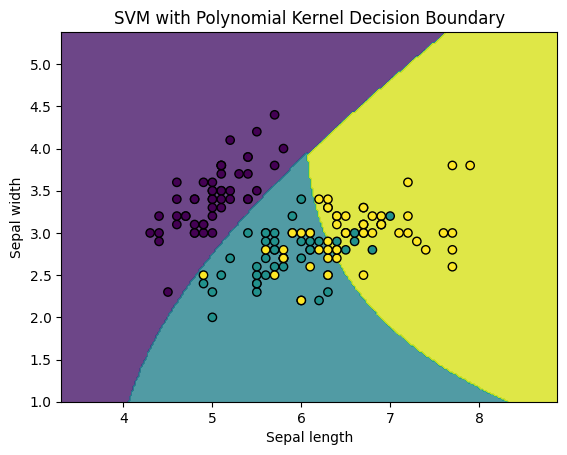

In [26]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:, :2]  # Use first two features for visualization
y = iris.target

svm = SVC(kernel='poly', degree=3)
svm.fit(X, y)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with Polynomial Kernel Decision Boundary')
plt.show()

In [27]:
# 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.94


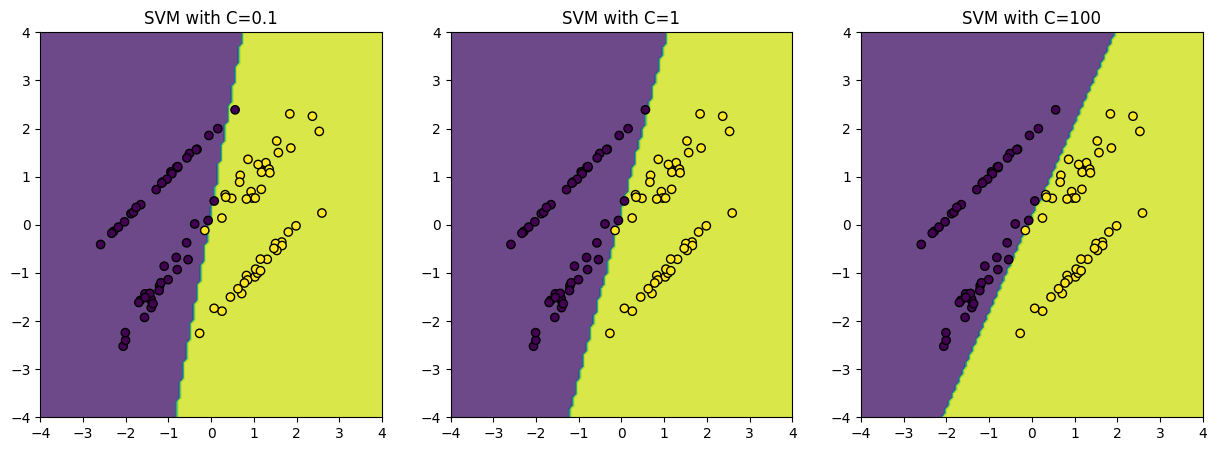

In [ ]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
import numpy as np

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C_values = [0.1, 1, 100]
plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values):
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)
    
    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'SVM with C={C}')
plt.show()

In [ ]:
# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X = (X > 0).astype(int)  # Convert to binary features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.76


In [ ]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Unscaled Accuracy: {acc_unscaled:.2f}")
print(f"Scaled Accuracy: {acc_scaled:.2f}")

Unscaled Accuracy: 1.00
Scaled Accuracy: 1.00


In [ ]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = (X * 10).astype(int)  # Discretize for MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without Laplace smoothing (alpha=1 by default)
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
acc_default = accuracy_score(y_test, y_pred)

# With Laplace smoothing (alpha=0.1)
mnb_smoothed = MultinomialNB(alpha=0.1)
mnb_smoothed.fit(X_train, y_train)
y_pred_smoothed = mnb_smoothed.predict(X_test)
acc_smoothed = accuracy_score(y_test, y_pred_smoothed)

print(f"Default Accuracy: {acc_default:.2f}")
print(f"Smoothed Accuracy: {acc_smoothed:.2f}")

Default Accuracy: 0.96
Smoothed Accuracy: 0.96


In [ ]:
# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Accuracy: {grid.best_score_:.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

In [ ]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without class weight
svm_unweighted = SVC()
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
acc_unweighted = accuracy_score(y_test, y_pred_unweighted)

# With class weight
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Unweighted Accuracy: {acc_unweighted:.2f}")
print(f"Weighted Accuracy: {acc_weighted:.2f}")

Unweighted Accuracy: 0.91
Weighted Accuracy: 0.90


In [29]:
# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"NB Accuracy: {acc_nb:.2f}")

SVM Accuracy: 1.00
NB Accuracy: 0.98


In [30]:
# 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"Accuracy with Feature Selection: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with Feature Selection: 1.00


In [31]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (Ovo) strategies on the Wine dataset and compare their accuracy.
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# OvR
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
y_pred_ovr = ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# OvO
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
y_pred_ovo = ovo.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OvR Accuracy: {acc_ovr:.2f}")
print(f"OvO Accuracy: {acc_ovo:.2f}")

OvR Accuracy: 0.72
OvO Accuracy: 0.80


In [32]:
# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"{kernel} Kernel Accuracy: {accuracy_score(y_test, y_pred):.2f}")

linear Kernel Accuracy: 0.96
poly Kernel Accuracy: 0.94
rbf Kernel Accuracy: 0.94


In [33]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.
from sklearn.model_selection import StratifiedKFold, cross_val_score

svm = SVC()
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm, X, y, cv=skf)
print(f"Average Accuracy: {scores.mean():.2f}")

Average Accuracy: 0.91


In [35]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
# Make sure priors match the number of classes in y_train
priors = [None, [0.5, 0.5]]  # Example for 2 classes
for prior in priors:
    nb = GaussianNB(priors=prior)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print(f"Priors: {prior}, Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Priors: None, Accuracy: 0.94
Priors: [0.5, 0.5], Accuracy: 0.94


In [36]:
# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.feature_selection import RFE

rfe = RFE(SVC(kernel='linear'), n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f"Accuracy with RFE: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with RFE: 0.92


In [37]:
# 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and FI-Score instead of accuracy.
from sklearn.metrics import classification_report

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [38]:
# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
from sklearn.metrics import log_loss

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)
print(f"Log Loss: {log_loss(y_test, y_prob):.2f}")

Log Loss: 0.68


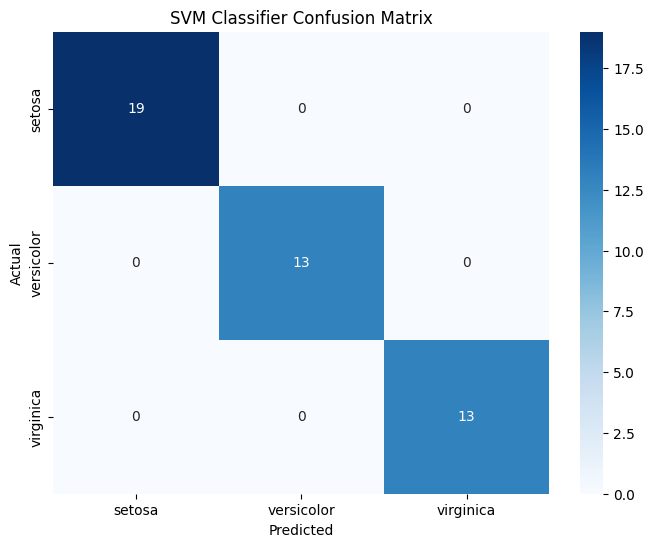

In [39]:
# 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict and create confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Classifier Confusion Matrix')
plt.show()

In [40]:
# 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svr.predict(X_test_scaled)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MAE: 0.40


In [41]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

# Load binary classification data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and predict probabilities
nb = GaussianNB()
nb.fit(X_train, y_train)
y_proba = nb.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC-AUC
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

ROC-AUC Score: 0.99


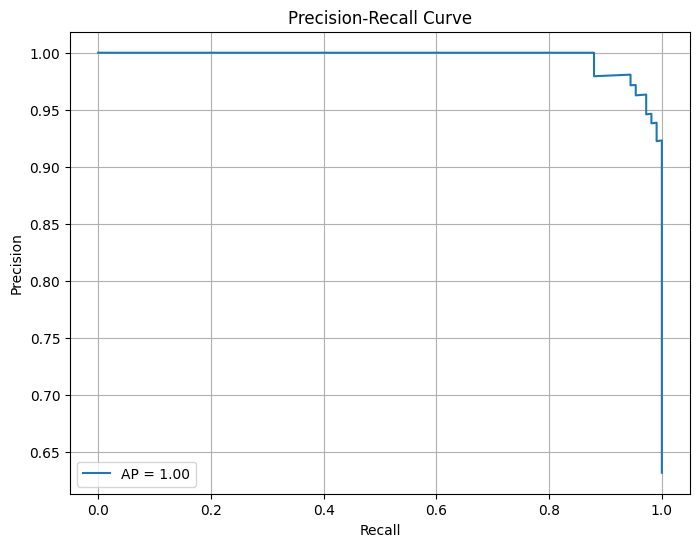

In [42]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Use breast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with probability estimates
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_proba = svm.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()